In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML

In [2]:
file_path = "Sri Lanka population.csv"
df=pd.read_csv(file_path)

In [3]:
print(df)

        Age Group  Year  population  Female    Male
0    0 to 4 years  1950      956890  469244  487646
1             NaN  1951      977173  479746  497427
2             NaN  1952      995369  489042  506327
3             NaN  1953     1013897  498173  515724
4             NaN  1954     1038985  510365  528620
..            ...   ...         ...     ...     ...
859           NaN  2017       34072   24422    9650
860           NaN  2018       34478   25108    9370
861           NaN  2019       34716   25682    9034
862           NaN  2020       35803   26905    8898
863           NaN  2021       37079   28211    8868

[864 rows x 5 columns]


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age Group   12 non-null     object
 1   Year        864 non-null    int64 
 2   population  864 non-null    int64 
 3   Female      864 non-null    int64 
 4   Male        864 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 33.9+ KB
None


In [5]:
df['Age Group']=df['Age Group'].fillna(method='ffill')

In [6]:
print(df.head())

      Age Group  Year  population  Female    Male
0  0 to 4 years  1950      956890  469244  487646
1  0 to 4 years  1951      977173  479746  497427
2  0 to 4 years  1952      995369  489042  506327
3  0 to 4 years  1953     1013897  498173  515724
4  0 to 4 years  1954     1038985  510365  528620


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age Group   864 non-null    object
 1   Year        864 non-null    int64 
 2   population  864 non-null    int64 
 3   Female      864 non-null    int64 
 4   Male        864 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 33.9+ KB
None


In [8]:
df['Female']=df['Female']*-1

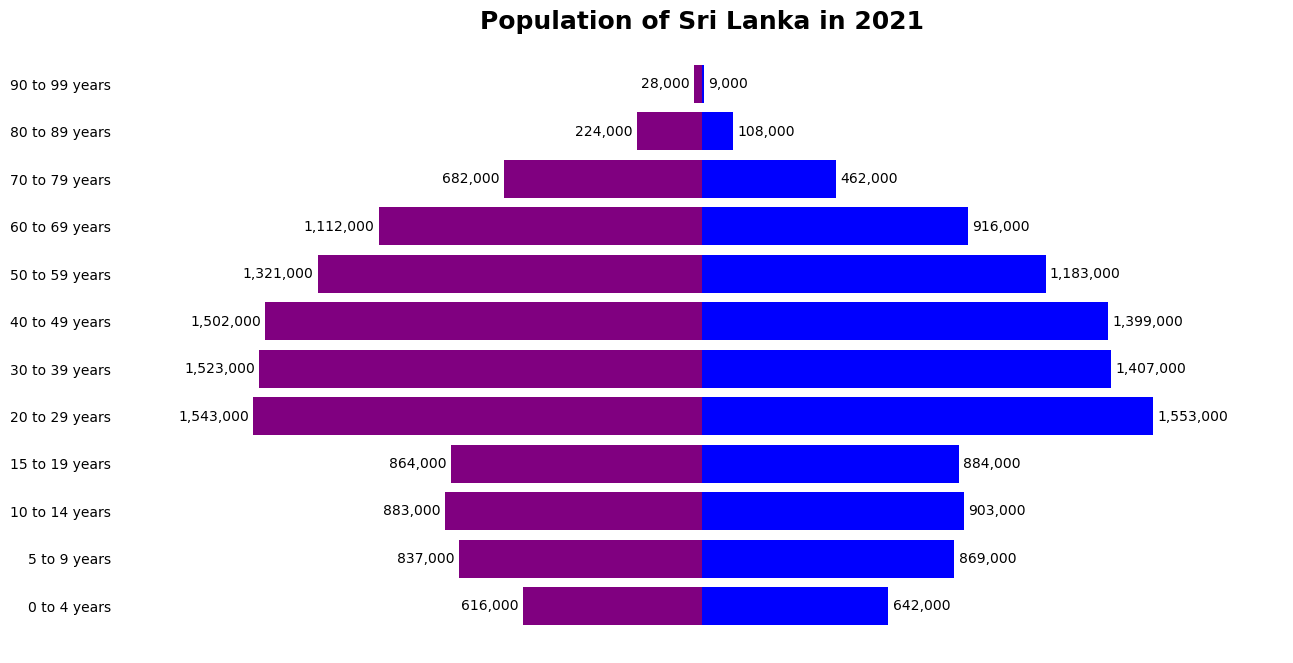

In [10]:
fig, ax=plt.subplots(figsize=(15,8))
def animate(year):
    ax.clear()
    filtered = df[df['Year']==year]
    males = plt.barh(y=filtered['Age Group'], width=filtered['Male'], color='Blue')
    females = plt.barh(y=filtered['Age Group'],width=filtered['Female'],color='purple')
    # Remove the overlapping
    ax.set_xlim(-2_000_000,2_000_000)
    ax.bar_label(males,padding=3,labels=[f'{round(value,-3):,}'for value in filtered['Male']])
    ax.bar_label(females, padding=3, labels=[f'{-1*round(value,-3):,}'for value in filtered['Female']])
    
    # Remove the edges
    for edge in ['top','bottom','left','right']:
        ax.spines[edge].set_visible(False)
        # Remove the '-' from the left side values
        ax.tick_params(left=False)
        # Remove axis
        ax.get_xaxis().set_visible(False)
        # Adding legend
        ax.set_title(f"Population of Sri Lanka in {year}", size=18, weight="bold")
        
# Add animation
animation = FuncAnimation(fig, animate, frames=range(df['Year'].min(), df['Year'].max()+1))
animation.save('Sri_Lanka_Population_Pyramid.gif',dpi=300,writer=PillowWriter(fps=10))
# Display the animation in the notebook
html_output=HTML(animation.to_jshtml())
display(html_output)